# Ideal rocket analysis

In [2]:
# this line makes figures interactive in Jupyter notebooks
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

# we can use this to solve nonlinear/transcendental equations
from scipy.optimize import root_scalar

# this provides access to many physical constants
from scipy import constants

# provides the 1976 US Standard Atmosphere model
from fluids.atmosphere import ATMOSPHERE_1976

# Module used to parse and work with units
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
# for convenience:
def to_si(quant):
    '''Converts a Pint Quantity to magnitude at base SI units.
    '''
    return quant.to_base_units().magnitude

In [3]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['mathtext.fontset'] = 'cm'

We previously derived the expression for rocket thrust $T$, based on conservation of momentum:

$$
T = \dot{m} V_e + A_e (p_e - p_a) \;,
$$

where $\dot{m}$ is the mass flow rate of propellant, $V_e$ is the exit/exhaust velocity, $A_e$ is the nozzle exit area, $p_e$ is the exit pressure, and $p_a$ is the ambient pressure. While mass flow rate, nozzle area, and ambient pressure are either design choices or determined by the mission, the values of $V_e$ and $p_e$ are less clear. We can analyze the flow and thermodynamic properties of an idealized rocket to determine these based on other key parameters.

:::{figure} ../images/ideal-rocket-analysis.svg
:label: fig-ideal-rocket
:alt: Diagram of a rocket internal flow and properties, with combustion chamber and nozzle
:align: center
:width: 80%

Diagram of a rocket, showing the combustion chamber (or heating chamber) with heat addition $q_R$, with stagnation properties $p_0$, $T_0$, and $V_0$; and converging-diverging nozzle, with mass flow rate $\dot{m}$. The nozzle has throat area $A_t$ and throat velocity $V_t$; and exit area $A_e$, velocity $V_e$, and pressure $p_e$.
:::

[](#fig-ideal-rocket) shows an idealized rocket with a combustion chamber and nozzle; we make the following assumptions:
- ideal gas 
- one-dimensional isentropic flow in the nozzle
- "combustion" is simply heat addition, with the resulting products at $T_0$ and $p_0$, and can be a stand-in for other energy deposition mechanisms.

## Thermodynamic properties

First, a quick review of static versus [stagnation properties](https://kyleniemeyer.github.io/gas-dynamics-notes/intro/stagnation.html):
- **Static properties**: Conditions measured in a moving flow
- **Stagnation properties**: Properties if the flow were isentropically brought to rest ($V = 0$) at zero potential ($z = 0$)

Starting from the steady-flow energy equation (neglecting potential energy changes and work/heat transfer in the nozzle):

$$
\begin{align}
h_1 + \frac{V_1^2}{2} + \cancel{gz_1} + \cancel{q} &= h_2 + \cancel{\frac{V_2^2}{2}} + \cancel{gz_2} + \cancel{W_s} \\
h_1 + \frac{V_1^2}{2} &= h_2 = h_0 \;.
\end{align}
$$

The stagnation enthalpy (also called total enthalpy) is defined as:

$$
\boxed{h_0 = h + \frac{V^2}{2}}
$$

with respect to static properties $h$ and $V$ somewhere in the flow.
Assuming constant specific heat $c_p$, we can also define the stagnation temperature

$$
\boxed{T_0 = T + \frac{V^2}{2c_p}} \;,
$$

which is often more useful than stagnation enthalpy.

:::{note}
In some applications, the **stagnation properties** are also called the **total properties**, and given subscript $t$. Here, we use $t$ to refer to the throat properties.
:::

## Derivation of exit velocity

To derive the exit velocity, let's examine each of the main subsystems in turn. First, examining the combustion chamber, with the propellent entering with enthalpy $h_1$, heat release from combustion $q_R$, and leaving with enthalpy $h_2$. The flow velocity is approximately zero ($V \approx 0$).

Then, an energy balance on the combustion chamber with negligible kinetic energy:

$$
h_1 + q_R = h_2
$$

where $q_R$ is the heat released by combustion, or otherwise added by another mechanism (e.g., nuclear fission, electrical heating).
The state at the exit of the combustion chamber is the state at the entrance to the nozzle.

Examining the nozzle portion of [](#fig-ideal-rocket), we move from location 0 at the nozzle inlet (where $V_0 \approx 0$),  through the throat ($t$), to the exit ($e$). Flow accelerates from subsonic to supersonic.

In the nozzle, $V_0 \ll V_e$ (the inlet velocity much smaller than exit velocity):

$$
h_0 + \frac{\cancel{V_0^2}}{2} + \cancel{gz_0} + \cancel{q} = h_e + \frac{V_e^2}{2} + \cancel{gz_e} + \cancel{W_s}
$$

Therefore

$$
h_0 = h_e + \frac{V_e^2}{2}
$$

and we can solve for exit velocity:

$$
\begin{align}
V_e^2 &= 2(h_0 - h_e) \\
V_e &= \sqrt{2(h_0 - h_e)} = \sqrt{2 c_p(T_0 - T_e)} \\
V_e &= \sqrt{2c_p T_0 \left( 1 - \frac{T_e}{T_0} \right)} \;.
\end{align}
$$

We can see that there are two contributions here: the stagnation enthlapy resulting from combustion or heat addition $h_0 = c_p T_0$, and the reduction of temperature through the nozzle ($1 - \frac{T_e}{T_0}$). 

:::{note}
To maximize $V_e$, we want to simultaneously maximize stagnation enthalpy and for $T_e/T_0 \rightarrow 0$, meaning $T_e \rightarrow 0$. Of course, a complete conversion of thermal energy/enthalpy to kinetic energy is not possible; we need additional analysis to understand how to find this ratio.
:::

Recall that, for ideal gases, we can express relationships between the specific heats:

$$
\begin{align}
\gamma &= \frac{c_p}{c_v} \\
c_p - c_v &= R \\
c_p &= \frac{\gamma R}{\gamma - 1} \;,
\end{align}
$$

where $c_p$ is the constant pressure specific heat, $c_v$ is the constant volume specific heat, $\gamma$ is the ratio of specific heats, and $R = R_u / \text{MW}$ is the specific gas constant.
($\gamma$ is going to be used a lot moving forward!)
For an isentropic flow through the nozzle, we can also express the temperature ratio with a pressure ratio:
$$
\frac{T_e}{T_0} = \left( \frac{p_e}{p_0} \right)^{\frac{\gamma - 1}{\gamma}} \;.
$$

Using these, we can finally express the exit velocity as

$$
\boxed{ V_e = \sqrt{\frac{2\gamma}{\gamma-1} \frac{R_u}{\text{MW}} T_0 \left[1 - \left(\frac{p_e}{p_0}\right)^{\frac{\gamma-1}{\gamma}} \right]} } \;.
\label{eq:exit-velocity}
$$

Let's examine the two main contributions in Equation [](#eq:exit-velocity):
- pressure term: $\left(\frac{p_e}{p_0}\right)^{(\gamma-1)/\gamma}$. This is a weak function of the propellant, via $\gamma$, but a strong function of the nozzle geometry. The further we can expand the flow (meaning, reduce the pressure) in the nozzle, the greater the exit velocity.
- enthalpy term: $\frac{2 \gamma}{\gamma-1} \frac{R_u}{\text{MW}} T_0$. This term is maximized with a low molecular weight and high stagnation temperature—meaning, from our combustion/heating process, we want a smaller but hot molecule as our working fluid moving through the nozzle and exhausting. 

The pressure term is essentially controlled by the nozzle, but the enthalpy term depends on how we are adding heat to the propellant. In a chemical rocket, which relies on combustion of one or more propellants, molecular weight of the products and the resulting temperature are not independent, and we have to balance these competing goals. For example, water (H$_2$O) and carbon dioxide (CO$_2$) are common combustion products from hydrocarbons, with greater carbon content in the fuel leading to more CO$_2$ in the products. If our propellant mixture is only hydrogen (H$_2$) and oxygen (O$_2$), then water is the primary product species. The molecular weight of H$_2$O is approximately 18 kg/kmol, while that of CO$_2$ is 44 kg/kmol.
We will discuss this more in later modules.

However, in a rocket relying on electric or nuclear heating, we can choose our propellant to have a low molecular weight, and the resulting temperature from heating is essentially independent of this choice and only limited by other materials. As a result, past research into nuclear thermal rockets has used hydrogen (H$_2$) as the propellant, due to its extremely low molecular weight (about 2 km/kmol).

## Characteristic velocity: c*

The **characteristic velocity** (pronounced "c-star") is defined as:

$$
c^* = \frac{P_0 A_t}{\dot{m}} \;,
$$

where $p_o$ is the combustion chamber pressure / the stagnation pressure, $A_t$ is the nozzle throat area, and $\dot{m}$ is the total mass flow rate of propellant.
$c^*$ characterizes the **energetics of the combustion process**—it measures how effectively the propellant's chemical energy is converted to gas thermal energy in the chamber.
It has units of velocity/speed, but does not actually represent a real velocity.

We can relate the above empirical definition of $c^*$ to thermodynamic properties inside the rocket. T derive, start by applying conservation of mass at the throat:

$$
\dot{m} = \rho V A = \rho_t V_t A_t \;,
$$

but, at the throat the Mach number $M = 1$, so:

$$
V_t = a_t = \sqrt{\gamma \frac{R_u}{MW} T_t} \;.
$$

From gas dynamics, we have the relationships between static and stagnation properties:

$$
\begin{align}
\frac{p_0}{p} &= \left(1 + \frac{\gamma-1}{2} M^2\right)^{\frac{\gamma}{\gamma-1}} \\
\frac{T_0}{T} &= 1 + \frac{\gamma-1}{2} M^2 \\
\frac{\rho_0}{\rho} &= \left(1 + \frac{\gamma-1}{2}M^2\right)^{\frac{1}{\gamma-1}} \;,
\end{align}
$$

which we can apply at the throat, where $M = 1$:

$$
\begin{align}
\frac{p_0}{p_t} &= \left(\frac{\gamma+1}{2}\right)^{\frac{\gamma}{\gamma-1}} \\
\frac{T_0}{T_t} &= \frac{\gamma+1}{2} \\
\frac{\rho_0}{\rho_t} &= \left(\frac{\gamma+1}{2}\right)^{\frac{1}{\gamma-1}} \;.
\end{align}
$$

Therefore, 

$$
\begin{align}
\rho_t &= \rho_0 \left(\frac{2}{\gamma+1}\right)^{\frac{1}{\gamma-1}} \\
T_t &= T_0 \frac{2}{\gamma+1} \;,
\end{align}
$$

and using the ideal gas law we can express $\rho_0$ as:

$$
\rho_0 = \frac{p_0 \, \text{MW}}{R_u T_0} \;.
$$

Inserting the mass flow rate at the throat into the expression for $c^*$, and after substitution and simplification, we get

$$
\boxed{c^* = \frac{p_0 A_t}{\dot{m}} = \sqrt{\frac{R_u T_0}{\gamma \, \text{MW}} \left( \frac{\gamma + 1}{2} \right)^{\frac{\gamma+1}{\gamma-1}} }} \;.
\label{eq:cstar}
$$

Looking at Equation [](#eq:cstar), we can make some key observations:
- $c^* = c^*(\gamma, \text{MW}, T_0)$ only; it is the primary **energetic performance parameter** of a rocket and is not a function of nozzle performance.
- $c^*$ increases with $\uparrow \sqrt{T_0/MW}$

:::{note}
$c^*$ is more fundamental than $I_{\text{sp}}$ because it isolates combustion performance from nozzle performance.
:::

### $c^*$ efficiency

The **$c^*$ efficiency** compares measured to theoretical characteristic velocity:

$$
\eta_{c^*} = \frac{c^*_{\text{measured}}}{c^*_{\text{theoretical}}} = \frac{P_0 A_t / \dot{m}}{\sqrt{\frac{R_u T_0}{\gamma \, \text{MW}} \left(\frac{\gamma+1}{2}\right)^{\frac{(\gamma+1)}{(\gamma-1)}}}}
$$

Typically, values of $\eta_{c^*} > 95\%$.



## Thrust coefficient: $C_F$

The **thrust coefficient** characterizes **nozzle performance**:

$$
C_F = \frac{T}{P_0 A_t} \;,
$$

and typically ranges from around one to just over two, depending on the nozzle and ambient pressure.
Like $c^*$, we can derive a theoretical expression based on nozzle properties. Starting from the thrust equation:

$$
\begin{align}
T &= \dot{m} V_e + A_e (p_e - p_a) \\
C_F &= \frac{T}{p_0 A_t} = \frac{\dot{m} V_e}{p_0 A_t} + \frac{A_e}{A_t}\left(\frac{p_e - p_a}{p_0}\right)
\end{align}
$$

Then, recalling the definition of $c^* = \frac{P_0 A_t}{\dot{m}}$, we can rewrite the first term as

$$
\frac{\dot{m} V_e}{P_0 A_t} = \frac{V_e}{c^*} \;,
$$

and after inserting the full expressions for $c^*$ and $V_e$ (from Equations [](#eq:exit-velocity) and [](#eq-cstar)), canceling terms and simplifying, we get

$$
\boxed{C_F = \sqrt{\frac{2\gamma^2}{\gamma-1} \left( \frac{2}{\gamma+1} \right)^{\frac{\gamma+1}{\gamma-1}} \left[1 - \left( \frac{p_e}{p_0} \right)^{\frac{\gamma-1}{\gamma}} \right] } + \frac{A_e}{A_t} \left( \frac{p_e - p_a}{p_0} \right) } \;.
\label{eq:thrust-coefficient}
$$

The first term represents the contribution to thrust by the exit velocity/momentum, and the second term the contribution to thrust by the exit pressure.

Some key takeaways:
- $C_F$ is *not* a function of chamber temperature at all.
- $C_F$ is *only* a function of the nozzle and ambient pressure

Examining Equation [](#eq-thrust-coefficient), we can see that, for a given nozzle design, only the term on the far right with $p_a$ will vary. Often, $C_F$ is split into the constant and variable terms:

$$
C_F = C_F^{\circ} + \Delta C_F (p_a) \;,
$$

where

<!-- $$
\begin{align}
C_F^{\circ} &= \sqrt{\frac{2\gamma^2}{\gamma-1} \left( \frac{2}{\gamma+1} \right)^{\frac{\gamma+1}{\gamma-1}} \left[1 - \left( \frac{p_e}{p_0} \right)^{\frac{\gamma-1}{\gamma}} \right] } + \frac{A_e}{A_t} \frac{p_e}{p_0} \\
\Delta C_F (p_a) &= - \frac{A_e}{A_t} \frac{p_a}{p_0} \;.
\end{align}
$$ -->
<!-- 
$C_F^{\circ}$ is the constant term of the thrust coefficient, representing the contribution to thrust by the exit velocity/momentum. $\Delta C_F$ accounts for ambient pressure effects, and is the contribution to thrust by the exit pressure. -->

Other commonly used formulations include the thrust coefficient for an *optimally expanded* nozzle, where $p_e = p_a$:

$$
C_{F, \text{opt}} = \sqrt{\frac{2\gamma^2}{\gamma-1} \left( \frac{2}{\gamma+1} \right)^{\frac{\gamma+1}{\gamma-1}} \left[1 - \left( \frac{p_e}{p_0} \right)^{\frac{\gamma-1}{\gamma}} \right] }
$$

and thrust coefficient in vacuum, where $p_a \approx 0$:

$$
C_{F, \text{vac}} = \sqrt{\frac{2\gamma^2}{\gamma-1} \left( \frac{2}{\gamma+1} \right)^{\frac{\gamma+1}{\gamma-1}} \left[1 - \left( \frac{p_e}{p_0} \right)^{\frac{\gamma-1}{\gamma}} \right] } + \frac{A_e}{A_t} \frac{p_e}{p_0} \;.
$$

## Relationships between thrust, specific impulse, and effective exhaust velocity

Using characteristic velocity ($c^*$) and thrust coefficient ($C_F$),
we can express thrust, specific impulse ($I_{\text{sp}}$), 
and effective exhause velocity ($c$):

$$
\begin{align}
T &= \dot{m} c^* C_F \\
I_{\text{sp}} &= \frac{c^* C_F}{g_0} \\
c &= c^* C_F \;.
\end{align}
$$

$I_{\text{sp}}$, $c$, and $T$ characterize the overall performance of a rocket, and are combined functions of the energetic and nozzle performance; $c^*$ and $C_F$ split these.

## Nozzle area ratio

Our expression for $C_F$ given in Equation [](#eq:thrust-coefficient) has both the area ratio of the nozzle ($A_e$ to $A_t$) and the pressure ratio ($p_e$ to $p_0$). However, the expansion of the flow (resulting in $p_e$ at the exit) *depends* on the area ratio, and we can derive this relationship.

For isentropic 1D flow in the nozzle, with an ideal gas, applying conservation of mass between the throat (where $M_t = 1$) and exit (where $V = V_e$) tells us

$$
\dot{m} = \rho_t V_t A_t = \rho_e V_e A_e \;,
$$

which can be rearranged to

$$
\begin{align}
\frac{A_e}{A_t} &= \frac{\rho_t}{\rho_e} \frac{V_t}{V_e} = \frac{\frac{p_t}{R T_t}}{\frac{p_e}{R T_e}} \frac{M_t a_t}{V_e} \\
\frac{A_e}{A_t} &= \frac{p_t}{p_e} \frac{T_e}{T_t} \frac{a_t}{V_e} \;, 
\end{align}
\label{eq:area-ratio-work1}
$$

but we know

$$
\begin{align}
a_t &= \sqrt{\gamma R T_t} \\
T_t &= T_0 \frac{2}{\gamma + 1} \\
p_t &= p_0 \left(\frac{2}{\gamma + 1} \right)^{\frac{\gamma}{\gamma-1}} \\
V_e &= \sqrt{\frac{2 \gamma R}{\gamma - 1} T_0 \left( 1 - \frac{T_e}{T_0} \right)} \;,
\end{align}
$$

which we can insert into the final expression in Equation [](#eq:area-ratio-work1) above to get

$$
\frac{A_e}{A_t} = \frac{p_0}{p_e} \left( \frac{2}{\gamma+1} \right)^{\frac{1}{\gamma-1}} \frac{T_e}{T_0} \sqrt{\frac{\gamma-1}{\gamma+1} \left( 1 - \frac{T_e}{T_0} \right)^{-1} } \;.
$$

Almost there! We just need to use our isentropic relationship between pressure and temperature:

$$
\frac{p_e}{p_0} = \left( \frac{T_e}{T_0} \right)^{\frac{\gamma}{\gamma-1}}
$$

and we can finally express the area ratio as a function of the pressure ratio:

$$
\boxed{\frac{A_e}{A_t} = \left(\frac{2}{\gamma+1}\right)^{\frac{1}{\gamma-1}} \left(\frac{p_e}{p_0}\right)^{-\frac{1}{\gamma}} \sqrt{\frac{\gamma-1}{\gamma+1}\left[1-\left(\frac{p_e}{p_0}\right)^{\frac{\gamma-1}{\gamma}}\right]^{-1} }} \;,
\label{eq:area-ratio-pressure}
$$

where we can see that $\frac{A_e}{A_t} = f \left(\gamma, \frac{p_e}{p_0} \right)$ only.
In other words, to achieve a desired pressure ratio of the nozzle, the required area ratio of the nozzle depends only on that pressure ratio and $\gamma$, not the temperature in the combustion chamber (i.e., the stagnation temperature).

::: {important}
In some references, the area ratio is expressed as $\epsilon = \frac{A_e}{A_t}$.
:::

### Exit Mach number

We can also express the relationship between the area ratio and exit Mach number $M_e$.
From conservation of mass between the throat and exit:

$$
\frac{A_e}{A_t} = \frac{\rho_t}{\rho_e} \frac{V_t}{V_e} = \frac{\rho_t}{\rho_e} \frac{M_t a_t}{M_e a_e} \;,
$$

but, again, $M_t = 1$, $a = \sqrt{\gamma R T}$, and we can relate static properties to stagnation properties based on the local Mach number.  Rearranging, we obtain

$$
\begin{align}
\frac{A_e}{A_t} &= \frac{1}{M_e} \frac{ \frac{\rho_t}{\rho_0} \sqrt{\frac{T_t}{T_0}} }{\frac{\rho_e}{\rho_0} \sqrt{\frac{T_e}{T_0}} } \\
&= \frac{1}{M_e} \frac{ \left(\frac{2}{\gamma+1}\right)^{\frac{1}{\gamma-1}} \left(\frac{2}{\gamma+1}\right)^{\frac{1}{2}} }{ \left( 1 + \frac{\gamma-1}{2} M_e^2 \right)^{\frac{-1}{\gamma-1}} \left( 1 + \frac{\gamma-1}{2} M_e^2 \right)^{\frac{-1}{2}} } \;.
\end{align}
$$

Simplifying, we get

$$
\boxed{\frac{A_e}{A_t} = \frac{1}{M_e}\left[\left(\frac{2}{\gamma+1}\right)\left(1+\frac{\gamma-1}{2}M_e^2\right)\right]^{\frac{\gamma+1}{2(\gamma-1)}}} \;.
\label{eq:area-ratio-mach}
$$


## Designing rocket nozzles

Rocket scientists (... rocket engineers) have used the above equations for thrust coefficient, area ratio, and Mach number to design rockets for many years.

For example, the following figures show area ratio vs. pressure ratio, and thrust coefficient (at optimum expansion conditions, where $p_e = p_a$)  vs. pressure ratio, both for various specific heat ratios:

:::{important}
For plotting convenience, here we use $\frac{p_0}{p_e}$ as the "pressure ratio", which is the inverse of the pressure ratio used in all the above equations.
:::

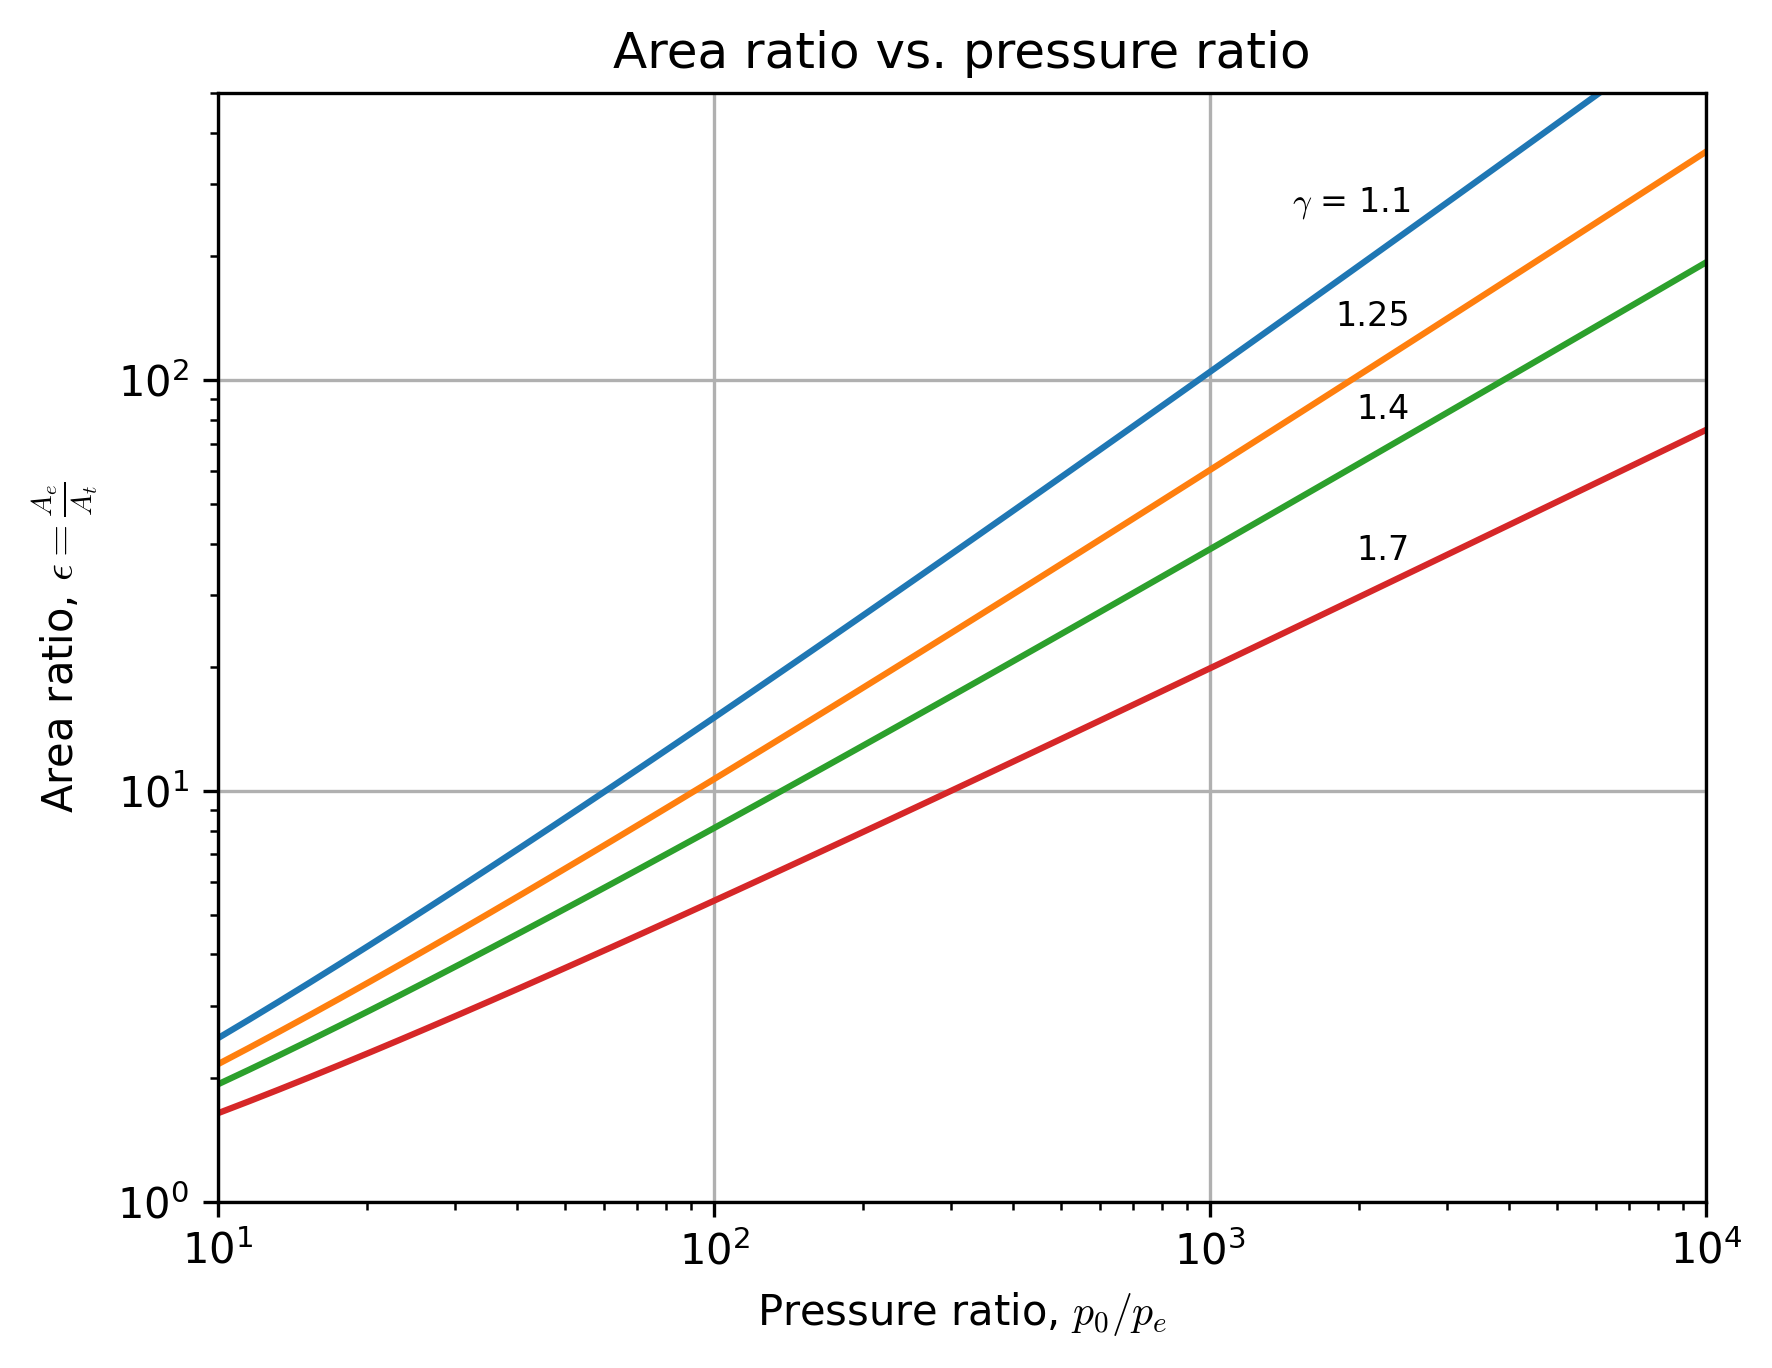

In [6]:
## area ratio as a function of pressure ratio

gammas = [1.1, 1.25, 1.4, 1.7]
pressure_ratios = np.logspace(1, 4, num=50)

labels = [r'$\gamma$ = 1.1', '1.25', '1.4', '1.7']

# let's define a function to calculate area ratio based on gamma and the pressure ratio:
def calc_area_ratio(gamma, pressure_ratio):
    '''Calculates area ratio based on specific heat ratio and pressure ratio.
    pressure ratio: chamber / exit
    area ratio: exit / throat
    '''
    return (
        np.power(2 / (gamma + 1), 1/(gamma-1)) * 
        np.power(pressure_ratio, 1 / gamma) *
        np.sqrt((gamma - 1) / (gamma + 1) /
                (1 - np.power(pressure_ratio, (1 - gamma)/gamma))
                )
        )

for gamma, label in zip(gammas, labels):
    area_ratios = calc_area_ratio(gamma, pressure_ratios)
    plt.plot(pressure_ratios, area_ratios)
    plt.text(
        0.9*pressure_ratios[-10], 1.01*area_ratios[-10], 
        label,
        horizontalalignment='right', fontsize=8
        )

plt.xlim([10, 1e4])
plt.ylim([1, 500])
plt.xlabel(r'Pressure ratio, $p_0 / p_e$')
plt.ylabel(r'Area ratio, $\epsilon = \frac{A_e}{A_t}$')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.title('Area ratio vs. pressure ratio')
plt.show()

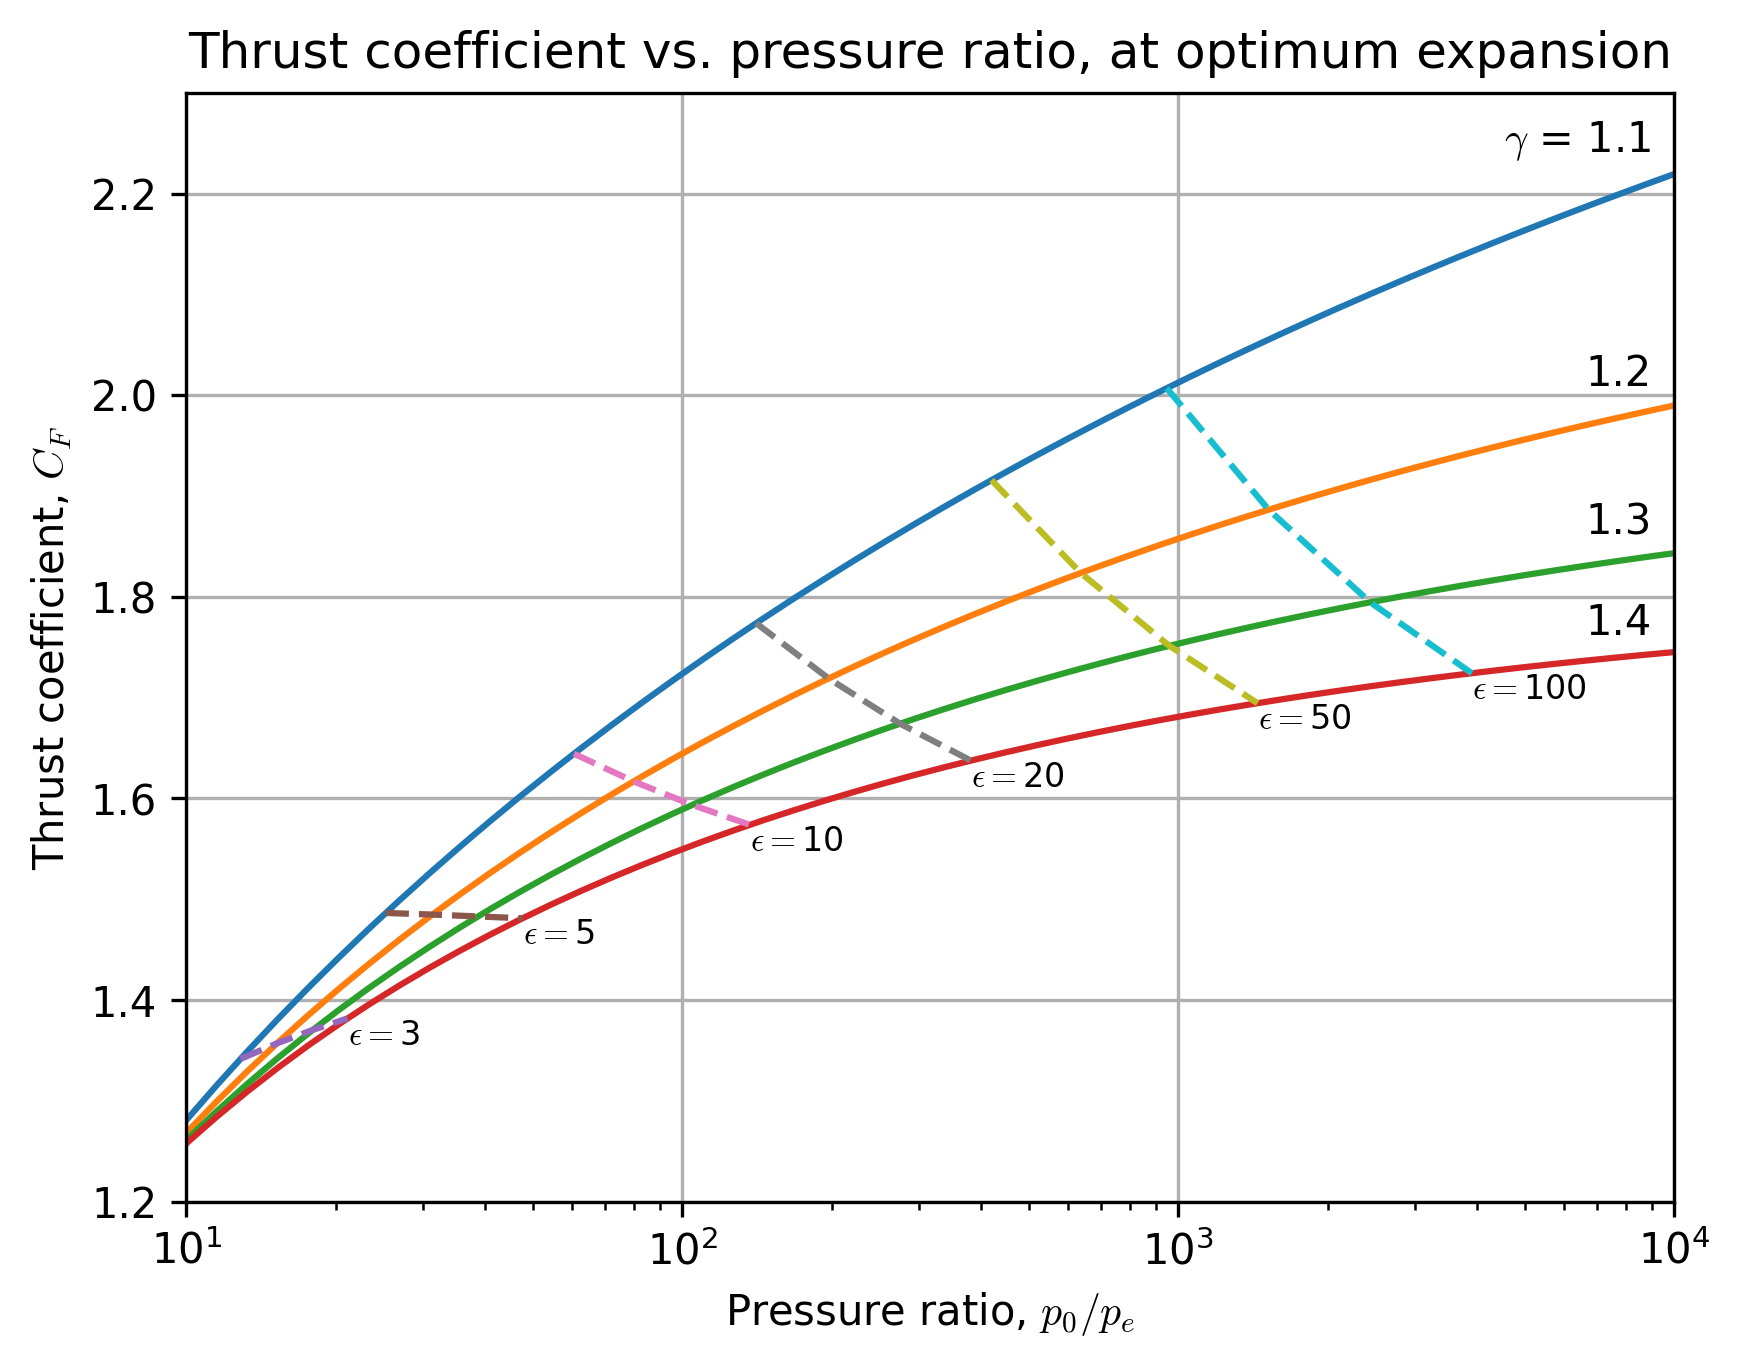

In [7]:
# Define a function to calculate thrust coefficient, assuming optimum expansion 
# (exit pressure = ambient pressure), based on gamma and pressure ratio:
def calc_thrust_coeff(gamma, pressure_ratio):
    ''' Calculates thrust coefficient for optimum expansion.
    pressure ratio: chamber / exit
    area ratio: exit / throat
    '''
    return np.sqrt(
        2 * np.power(gamma, 2) / (gamma - 1) * 
        np.power(2 / (gamma + 1), (gamma + 1)/(gamma - 1)) * 
        (1 - np.power(1.0 / pressure_ratio, (gamma - 1)/gamma))
        )


# This function returns zero for a given area ratio, pressure ratio, and gamma,
#and is used to numerically calculate pressure ratio given the other two values.
def root_area_ratio(pressure_ratio, gamma, area_ratio):
    ''' pressure ratio: chamber / exit
    area ratio: exit / throat
    '''
    return area_ratio - calc_area_ratio(gamma, pressure_ratio)


gammas = [1.1, 1.2, 1.3, 1.4]
labels = [r'$\gamma$ = 1.1', '1.2', '1.3', '1.4']
area_ratios = [3, 5, 10, 20, 50, 100]

pressure_ratios = np.logspace(1, 4, num=50)

for gamma, label in zip(gammas, labels):
    thrust_coeffs = calc_thrust_coeff(gamma, pressure_ratios)
    
    plt.plot(pressure_ratios, thrust_coeffs)
    plt.text(
        0.9*pressure_ratios[-1], 1.01*thrust_coeffs[-1], 
        label, horizontalalignment='right'
        )

for area_ratio in area_ratios:
    pressure_ratios2 = np.zeros(len(gammas))
    thrust_coeffs2 = np.zeros(len(gammas))
    for idx, gamma in enumerate(gammas):
        sol = root_scalar(root_area_ratio, x0=20, x1=100, args=(gamma, area_ratio))
        pressure_ratios2[idx] = sol.root
        thrust_coeffs2[idx] = calc_thrust_coeff(gamma, sol.root)
    
    plt.plot(pressure_ratios2, thrust_coeffs2, '--')
    plt.text(
        pressure_ratios2[-1], thrust_coeffs2[-1],
        r'$\epsilon =$' + f'{area_ratio}',
        horizontalalignment='left', verticalalignment='top', fontsize=8
        )
    
plt.xlim([10, 1e4])
plt.ylim([1.2, 2.3])
plt.xlabel(r'Pressure ratio, $p_0/p_e$')
plt.ylabel(r'Thrust coefficient, $C_F$')
plt.grid(True)
plt.xscale('log')
plt.title('Thrust coefficient vs. pressure ratio, at optimum expansion')
plt.show()

## Example: using equations to design optimal rocket nozzle

Using the above equations, design a rocket nozzle optimally for these conditions:
$p_c$ = 70 atm, $p_e$ = 1 atm, and $\gamma$ = 1.2.
Find the nozzle area ratio, and the rocket thrust as a function of nozzle exit area.

We know the pressure ratio:

$$
\frac{p_c}{p_e} = \frac{p_0}{p_e} = 70 \;,
$$

so we can directly calculate the nozzle area ratio using Equation [](#eq:area-ratio-pressure).

In [8]:
# set the given constants
chamber_pressure = Q_(70, 'atm')
exit_pressure = Q_(1, 'atm')
gamma = 1.2

pressure_ratio = chamber_pressure / exit_pressure

area_ratio = (
    np.power(2 / (gamma + 1), 1/(gamma-1)) * 
    np.power(pressure_ratio, 1 / gamma) *
    np.sqrt((gamma - 1) / (gamma + 1) /
        (1 - np.power(pressure_ratio, (1 - gamma)/gamma))
        )
    )
print(f'Nozzle area ratio: {area_ratio: 3.2f~P}')

Nozzle area ratio:  9.06


Since $p_e = p_a$ by design (for an optimal nozzle), we can calculate the thrust coefficient using Equation [](#eq:thrust-coefficient).

and then thrust using:

$$
T = C_F^0 p_c A_e \frac{A_t}{A_e} \;.
$$

In [11]:
thrust_coeff = np.sqrt(
    2 * np.power(gamma, 2) / (gamma - 1) * 
    np.power(2 / (gamma + 1), (gamma + 1)/(gamma - 1)) * 
    (1 - np.power(1.0 / pressure_ratio, (gamma - 1)/gamma))
    )
print(f'Thrust coefficient = {thrust_coeff: 3.2f~P}')

thrust_per_area = thrust_coeff * chamber_pressure / area_ratio
print(f'Thrust / A_e = {thrust_per_area.to("kN/m^2"): 5.1f~P}')

Thrust coefficient =  1.60
Thrust / A_e =  1252.5 kN/m²


We can now examine the thrust for a range of exit areas:

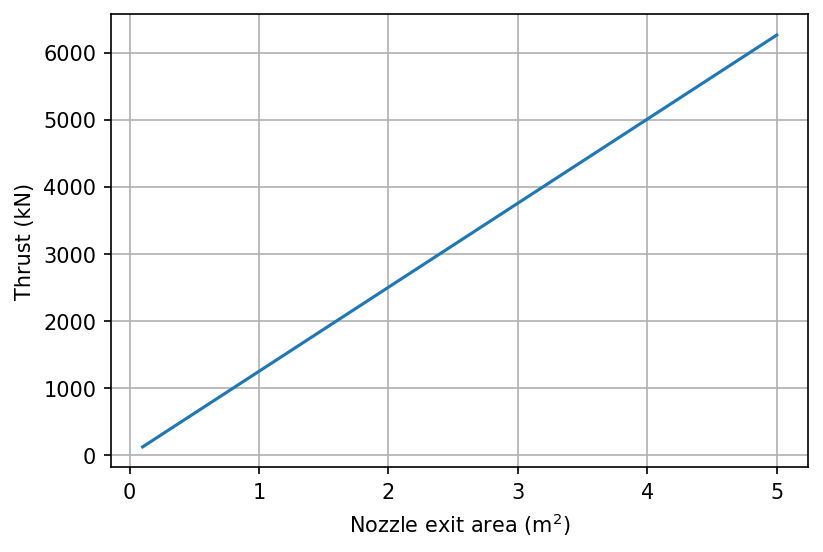

In [9]:
exit_areas = Q_(np.linspace(0.1, 5, num=50), 'm^2')
plt.plot(exit_areas.to('m^2').magnitude, (thrust_per_area * exit_areas).to('kN').magnitude)
plt.xlabel('Nozzle exit area ' + r'(m$^2$)')
plt.ylabel('Thrust (kN)')
plt.grid(True)
plt.show()

## Example: conceptual design of a rocket

Now, let's design a rocket for horizontal flight at an altitude of 10 km. The rocket must generate 100 kN of thrust for 5 seconds.

You are given this other information:
- $c^*$ = 1500 m/s
- $\gamma$ = 1.2
- MW = 25 kg/kmol
- $p_c$ = 70 bar

(In reality, these would come from the propellant combination or experience, but these are typical values one might start a design using, if the propellant combination is not yet known.)

Find these design parameters:
- Nozzle area ratio ($A_e / A_t$)
- Mass flow rate of propellant ($\dot{m}$)
- Mass of propellant ($m_p$)
- Specific impulse ($I_{\text{sp}}$) and total impulse ($I$)
- Nozzle throat diameter ($D_t$) and exit diameter ($D_e$)
- Chamber temperature ($T_c$)
- Sea-level thrust ($T$)

Total impulse is defined as the integral of thrust over the burn time:
$$
I = \int_0^{t_b} T dt \;.
$$

In [13]:
# given constants
altitude = Q_(10, 'km')
c_star = Q_(1500, 'm/s')
gamma = 1.2
MW = Q_(25, 'kg/kmol')
chamber_pressure = Q_(70, 'bar')
thrust_10k = Q_(100, 'kN')
burn_time = Q_(5, 's')

First, we need to calculate the nozzle pressure ratio, which requires obtaining the pressure at the rocket's flight altitude.

The 1976 U.S. Standard Atmosphere {cite:p}`standard_atmosphere_1976` is a model for how pressure, temperature, density, etc., vary with altitude in the atmosphere, and provides reasonable answers for up to about 86 km.

The [`fluids` package](https://github.com/CalebBell/fluids) provides a convenient interface to this model in Python {cite:p}`fluids`, along with other models such as the NRLMSISE-00 model {cite:p}`Picone2002`, which applies up to 1000 km.

We can use this to obtain the pressure at the flight altitude, and calculate pressure ratio:

$$
\frac{p_c}{p_e} = \frac{p_0}{p_e}
$$

In [17]:
# use model for 1976 US Standard Atmosphere to get pressure at altitude
ten_km = ATMOSPHERE_1976(to_si(altitude))
exit_pressure = Q_(ten_km.P, 'Pa')
print(f'Pressure at {altitude.to("km")}: {exit_pressure: .0f}')

pressure_ratio = chamber_pressure / exit_pressure
print(f'Pressure ratio (p_0/p_e): {pressure_ratio.to_base_units(): .1f}')

Pressure at 10 kilometer:  26500 pascal
Pressure ratio (p_0/p_e):  264.2 dimensionless


Next, we can calculate the nozzle area ratio and thrust coefficient. Since we are designing for operation at a specific altitude, the nozzle should be optimally expanded, or $p_e = p_a$:

$$
\begin{align}
\frac{A_e}{A_t} &= f \left( \gamma, \frac{p_0}{p_e} \right) \\
C_F &= g \left( \gamma, \frac{p_0}{p_e} \right) \\
\end{align}
$$

which are defined in Equations [](#eq:area-ratio-pressure) and [](#eq:thrust-coefficient) above—and we have already written functions to evaluate them!

In [20]:
area_ratio = calc_area_ratio(gamma, pressure_ratio)
print(f'Area ratio: {area_ratio.to_base_units(): .2f~P}')

thrust_coeff = calc_thrust_coeff(gamma, pressure_ratio)
print(f'Thrust coefficient: {thrust_coeff.to_base_units(): .2f~P}')

Area ratio:  25.10
Thrust coefficient:  1.75


Then, we can find the throat area and diameter using:

$$
\begin{align}
A_t &= \frac{T}{C_F p_0} \\
D_t &= 2 \sqrt{\frac{A_t}{\pi}}
\end{align}
$$

In [21]:
throat_area = thrust_10k / (thrust_coeff * chamber_pressure)
print(f'Throat area: {throat_area.to("m^2"): .4f~P}')

throat_diameter = 2 * np.sqrt(throat_area / np.pi)
print(f'Throat diameter: {throat_diameter.to("m"): .3f~P}')

Throat area:  0.0082 m²
Throat diameter:  0.102 m


And, the exit area and exit diameter using

$$
\begin{align}
A_e &= \frac{A_e}{A_t} A_t \\
D_e &= 2 \sqrt{\frac{A_e}{\pi}}
\end{align}
$$

In [23]:
exit_area = area_ratio * throat_area
print(f'Exit area: {exit_area.to("m^2"): .4f~P}')

exit_diameter = 2 * np.sqrt(exit_area / np.pi)
print(f'Exit diameter: {exit_diameter.to("m"): .3f~P}')

Exit area:  0.2051 m²
Exit diameter:  0.511 m


The mass flow rate is then

$$
\dot{m} = \frac{p_0 A_t}{c^*}
$$

In [24]:
mass_flow_rate = chamber_pressure * throat_area / c_star
print(f'Mass flow rate: {mass_flow_rate.to("kg/s"): .2f~P}')

Mass flow rate:  38.14 kg/s


And specific impulse can be found using

$$
I_{\text{sp}} = \frac{c^* C_F}{g_0}
$$

In [25]:
specific_impulse = c_star * thrust_coeff / Q_(constants.g, 'm/s^2')
print(f'Specific impulse: {specific_impulse.to("s"): .1f~P}')

Specific impulse:  267.3 s


Assuming a constant thrust and mass flow rate over the burn time, the propellant mass is

$$
m_p = \dot{m} t_b
$$

In [26]:
propellant_mass = mass_flow_rate * burn_time
print(f'Propellant mass: {propellant_mass.to("kg"): .1f~P}')

Propellant mass:  190.7 kg


The chamber temperature can be found by rearranging the $c^*$ expression:

$$
T_0 = \left( c^* \right)^2 \left( \frac{2}{\gamma+1} \right)^{\frac{\gamma+1}{\gamma-1}} \frac{\gamma \, \text{MW}}{R_u}
$$

In [27]:
# constant.R is given in J/(K mol), need J/(K kmol)
chamber_temperature = (
    c_star**2 * gamma * (MW / Q_(constants.R, 'J/(K*mol)')) * 
    np.power(2 / (gamma+1), (gamma+1)/(gamma-1))
    )
print(f'Chamber temperature: {chamber_temperature.to("K"): .1f~P}')

Chamber temperature:  2845.4 K


And, finally, to find the thrust at sea level, we need to calculate a new thrust coefficient, since $\Delta C_F$ is now nonzero. We can just calculate the new term and modify the original calculation of $C_F^{\circ}$.

::: {important}
Remember: once the nozzle geometry is fixed, the exit pressure will be constant for a given chamber pressure. In this case, we chose $p_e$ to match the ambient pressure at a particular altitude, which means that $p_e \neq p_a$ when operating at sea level.
:::

In [28]:
# Thrust at sea level
thrust_coeff_sea_level = thrust_coeff + area_ratio * (
    1/pressure_ratio - Q_(1, 'atm')/chamber_pressure
    )
thrust_sea_level = thrust_coeff_sea_level * chamber_pressure * throat_area
print(f'Thrust at sea level: {thrust_sea_level.to("kN"): .1f~P}')

Thrust at sea level:  84.7 kN
